In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
initial_fraction = 1/100

def steps_to_zero(initial_fraction, r):
    fraction = initial_fraction
    last_fraction = 1
    cnt = 0
    while fraction != last_fraction:
        last_fraction = fraction
        fraction /= (1 + r)
        cnt += 1
    return cnt

steps_to_zero(initial_fraction, .001)

733871

In [3]:
rs = np.logspace(-5, -1, 100)
ts = list(map(lambda x: steps_to_zero(initial_fraction, x), rs))

In [4]:
rs_arr = np.array(rs)[::3]
ts_arr = np.array(ts)[::3]

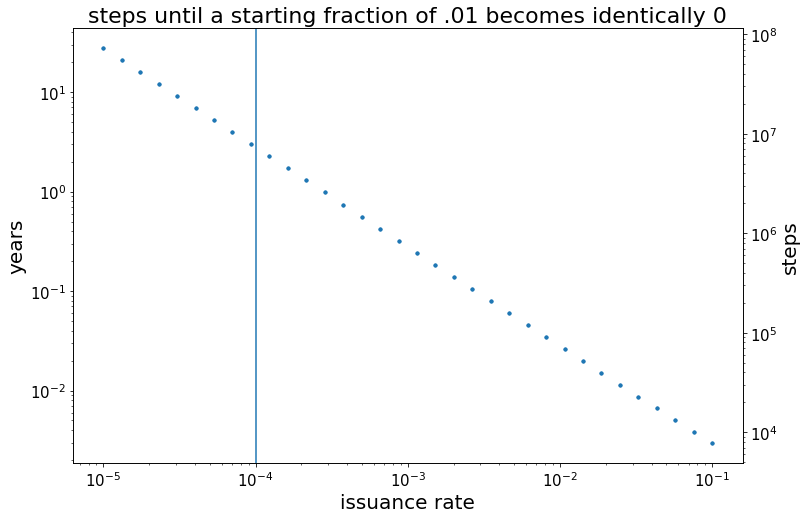

In [6]:
f, ax = plt.subplots(figsize=(12, 8))

twin = ax.twinx()

ax.axvline(1e-4)
ax.tick_params(axis='both', which='both', labelsize=15)
twin.tick_params(axis='both', which='both', labelsize=15)
ax.loglog(rs_arr, ts_arr * 12 / 3600 / 24 / 365, '.')
ax.set_xlabel('issuance rate', fontsize=20)
twin.loglog(rs_arr, ts_arr, '.')

ax.set_ylabel('years', fontsize=20)
twin.set_ylabel('steps', fontsize=20)

ax.set_title('steps until a starting fraction of .01 becomes identically 0', fontsize=22)

f.savefig('time_to_numerical_zero.png')